## Step 1: Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2: Load the Datasets

In [2]:
rainfall_df = pd.read_csv(r"D:\Internship_Project\datasets\rainfall_IMD.csv")
agri_df = pd.read_csv(r"D:\Internship_Project\datasets\agriculture_gujarat.csv")

print("Datasets loaded successfully!\n")

print("Rainfall dataset preview:")
display(rainfall_df.head())

print("\nAgriculture dataset preview:")
display(agri_df.head())

Datasets loaded successfully!

Rainfall dataset preview:


,Year,Actual,Forecast,Remark
0,2020,111,102,Outside the forecast error limit
1,2021,100,101,Accurate
2,2022,106,103,Accurate
3,2023,95,96,Accurate
4,2024,108,106,Accurate



Agriculture dataset preview:


,Sr. No.,Crops,Area,Production,Yield
0,1.0,Groundnut,1694.42,4642.46,2739.85
1,2.0,Castor seed,724.77,1551.72,2140.99
2,3.0,Sesamum,163.31,130.71,800.42
3,4.0,Rapeseed & Mustard,277.35,554.53,1999.41
4,5.0,Soyabean,265.74,488.30,1837.52


## Step 3: Inspect Basic Info

In [12]:
print("----------------------------------------\n")
print("Rainfall Dataset Info:")
print("-----------------------")
print(rainfall_df.info(), "\n")
print("----------------------------------------\n")
print("Agriculture Dataset Info:")
print("--------------------------")
print(agri_df.info(), "\n")
print("----------------------------------------\n")
print("Null values check:")
print("-------------------")
print("Rainfall nulls:\n", rainfall_df.isnull().sum())
print("Agriculture nulls:\n", agri_df.isnull().sum())

----------------------------------------

Rainfall Dataset Info:
-----------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Year      5 non-null      int64 
 1   Actual    5 non-null      int64 
 2   Forecast  5 non-null      int64 
 3   Remark    5 non-null      object
dtypes: int64(3), object(1)
memory usage: 292.0+ bytes
None 

----------------------------------------

Agriculture Dataset Info:
--------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sr. No.     6 non-null      float64
 1   Crops       7 non-null      object 
 2   Area        7 non-null      float64
 3   Production  7 non-null      float64
 4   Yield       7 non-null      float64
dtypes: float64(4), object(1)
memory us

## Step 4: Clean Column Names

In [13]:
rainfall_df.columns = rainfall_df.columns.str.strip().str.replace(" ", "_")
agri_df.columns = agri_df.columns.str.strip().str.replace(" ", "_")

print("Cleaned Column Names:\n")
print("Rainfall:", rainfall_df.columns.tolist())
print("Agriculture:", agri_df.columns.tolist())

Cleaned Column Names:

Rainfall: ['Year', 'Actual', 'Forecast', 'Remark']
Agriculture: ['Sr._No.', 'Crops', 'Area', 'Production', 'Yield']


## Step 5: Handle Extra Rows / Summaries

In [14]:
agri_df = agri_df[~agri_df['Crops'].str.contains("Total", case=False, na=False)].reset_index(drop=True)

print("Cleaned agriculture data (after removing 'Total' row):")
display(agri_df)

Cleaned agriculture data (after removing 'Total' row):


,Sr._No.,Crops,Area,Production,Yield
0,1.0,Groundnut,1694.42,4642.46,2739.85
1,2.0,Castor seed,724.77,1551.72,2140.99
2,3.0,Sesamum,163.31,130.71,800.42
3,4.0,Rapeseed & Mustard,277.35,554.53,1999.41
4,5.0,Soyabean,265.74,488.30,1837.52
5,6.0,Other Oilseeds,1.36,0.90,664.47


## Step 6: Convert Datatypes

In [15]:
num_cols_agri = ['Area', 'Production', 'Yield']
agri_df[num_cols_agri] = agri_df[num_cols_agri].apply(pd.to_numeric, errors='coerce')

num_cols_rain = ['Year', 'Actual', 'Forecast']
rainfall_df[num_cols_rain] = rainfall_df[num_cols_rain].apply(pd.to_numeric, errors='coerce')

print("Datatypes fixed!")

Datatypes fixed!


## Step 7: Add “State” and “Year” Columns for Integration

In [16]:
agri_df['State'] = 'Gujarat'
agri_df['Year'] = 2024  # assume latest agricultural cycle
rainfall_df['State'] = 'All-India'

print("Context columns added:")
display(agri_df.head())
display(rainfall_df.head())

Context columns added:


,Sr._No.,Crops,Area,Production,Yield,State,Year
0,1.0,Groundnut,1694.42,4642.46,2739.85,Gujarat,2024
1,2.0,Castor seed,724.77,1551.72,2140.99,Gujarat,2024
2,3.0,Sesamum,163.31,130.71,800.42,Gujarat,2024
3,4.0,Rapeseed & Mustard,277.35,554.53,1999.41,Gujarat,2024
4,5.0,Soyabean,265.74,488.30,1837.52,Gujarat,2024


,Year,Actual,Forecast,Remark,State
0,2020,111,102,Outside the forecast error limit,All-India
1,2021,100,101,Accurate,All-India
2,2022,106,103,Accurate,All-India
3,2023,95,96,Accurate,All-India
4,2024,108,106,Accurate,All-India


## Step 8: Quick Sanity Visualization

C:\Users\hp\AppData\Local\Temp\ipykernel_2924\801268974.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Crops', y='Yield', data=agri_df, palette='viridis')


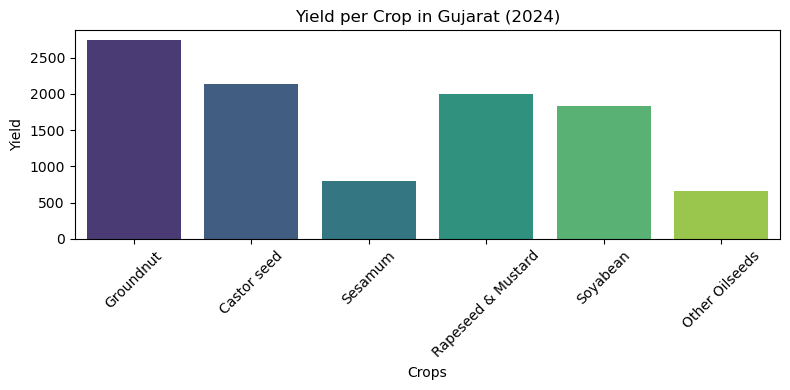

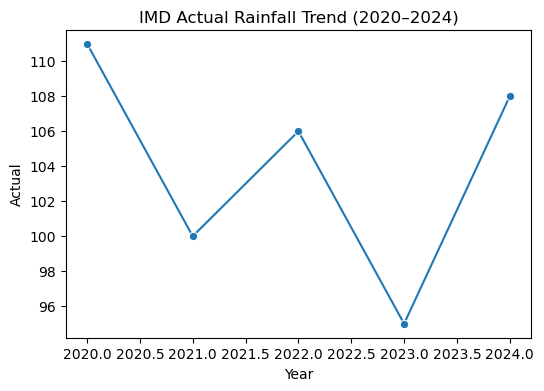

In [17]:
plt.figure(figsize=(8,4))
sns.barplot(x='Crops', y='Yield', data=agri_df, palette='viridis')
plt.title('Yield per Crop in Gujarat (2024)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
sns.lineplot(x='Year', y='Actual', data=rainfall_df, marker='o')
plt.title('IMD Actual Rainfall Trend (2020–2024)')
plt.show()

## Step 9: Save Cleaned Files

In [18]:
agri_df.to_csv(r"D:\Internship_Project\datasets\agriculture_gujarat_clean.csv", index=False)
rainfall_df.to_csv(r"D:\Internship_Project\datasets\rainfall_IMD_clean.csv", index=False)

print("Cleaned datasets saved successfully in D drive!")

Cleaned datasets saved successfully in D drive!


In [21]:
rainfall_df = pd.read_csv(r"D:\Internship_Project\datasets\rainfall_IMD_clean.csv")
agri_df = pd.read_csv(r"D:\Internship_Project\datasets\agriculture_gujarat_clean.csv")

print("Datasets loaded successfully!\n")

print("Rainfall dataset preview:")
display(rainfall_df.head())

print("\nAgriculture dataset preview:")
display(agri_df.head())

Datasets loaded successfully!

Rainfall dataset preview:


,Year,Actual,Forecast,Remark,State
0,2020,111,102,Outside the forecast error limit,All-India
1,2021,100,101,Accurate,All-India
2,2022,106,103,Accurate,All-India
3,2023,95,96,Accurate,All-India
4,2024,108,106,Accurate,All-India



Agriculture dataset preview:


,Sr._No.,Crops,Area,Production,Yield,State,Year
0,1.0,Groundnut,1694.42,4642.46,2739.85,Gujarat,2024
1,2.0,Castor seed,724.77,1551.72,2140.99,Gujarat,2024
2,3.0,Sesamum,163.31,130.71,800.42,Gujarat,2024
3,4.0,Rapeseed & Mustard,277.35,554.53,1999.41,Gujarat,2024
4,5.0,Soyabean,265.74,488.30,1837.52,Gujarat,2024
